# Image classification using ResNet50

This notebook illustrates how to perform image classification using ResNet50 and demonstrate adversarial examples.


In [1]:
# Import the model
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image as image
from keras.preprocessing.image import img_to_array


# NumPy for manipulating images as multi-dimensional arrays
import numpy as np
# PyPlot for plotting
import matplotlib.pyplot as plt
# ResNet50 model
model = ResNet50(weights='imagenet')

Using TensorFlow backend.


## Helper method to display the results

In [2]:
def get_bar_chart(img, predictions):   
    transpose_predictions = np.transpose(predictions)
    classifications = transpose_predictions[1]
    values = transpose_predictions[2].astype(np.float)
    print('Predictions: ', predictions)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=5, hspace=None)
    ax1.imshow(img)
    y_pos = np.arange(len(classifications))
    ax2.barh(y_pos, values, align='center')
    ax2.set_xlabel('Prediction')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(classifications)
    ax2.invert_yaxis()
    plt.tight_layout()

## Load an image and show predictions

Predictions:  [('n04254680', 'soccer_ball', 0.7129555), ('n01882714', 'koala', 0.28691512), ('n04399382', 'teddy', 3.623731e-05), ('n04540053', 'volleyball', 3.1504336e-05), ('n02500267', 'indri', 9.945011e-06)]


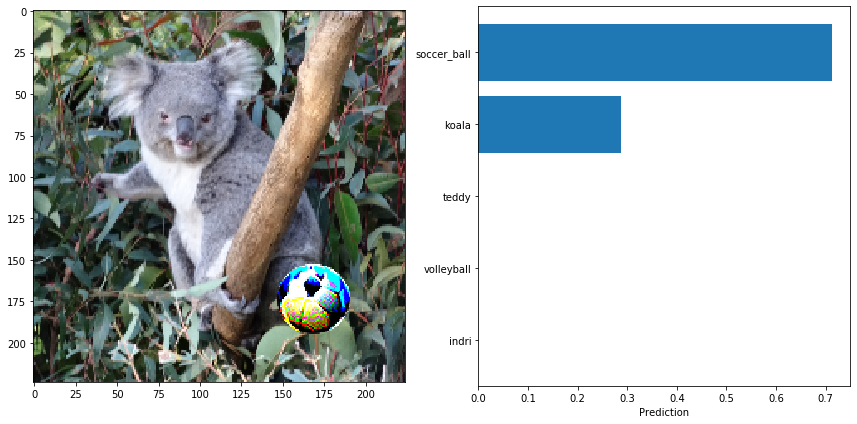

In [3]:
# Get a new image
# image_path = 'images/koala.jpg'
# image_path = 'images/koala_with_ball.png'
image_path = 'images/koala_with_ball_adv_3.png'

# Prepare image for passing to ResNet50
img = keras.preprocessing.image.load_img(image_path, target_size = [224, 224])
img_np = keras.preprocessing.image.img_to_array(img)
image_np_exp = np.expand_dims(img_np, axis=0)
image_for_resnet = preprocess_input(image_np_exp) 

predictions = decode_predictions(model.predict(image_for_resnet), top=5)[0]
get_bar_chart(img, predictions)